ASTR 19 Group Project

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

In [3]:
# Given Data Set
data = """
1  8:07  6.57
1 15:37 -0.39
2  8:55  5.38
2 16:25 -1.74
3  9:45  5.26
3 17:14 -1.36
4 10:35  4.13
4 18:00 -1.15
5 11:28  3.48
5 18:46 -1.61
6 12:22  2.62
6 19:31  0.05
7 13:24  1.83
7 20:16  1.01
8  3:22  3.57
8 21:01  0.73
9  4:07  4.54
9 21:46  2.17
10  4:50  3.76
10 11:58  2.88
11  5:31  3.90
11 12:56  1.92
12  6:08  4.73
12 13:45  1.74
13  6:47  5.66
13 14:25  0.79
14  7:22  5.33
14 15:00 -0.04
15  7:59  5.23
15 15:34 -1.12
16  8:34  6.67
16 16:08 -0.61
17  9:10  4.74
17 16:41 -0.93
18  9:45  4.69
18 17:12 -1.29
19 10:21  4.20
19 17:45  0.22
20 10:57  3.68
20 18:15  0.26
21 11:38  2.47
21 18:48  0.36
22 12:25  2.59
22 19:20  0.99
23  2:22  4.10
23 19:52  1.87
24  2:58  3.17
24 20:30  1.60
25  3:37  3.71
25 10:44  3.10
26  4:23  4.04
26 11:55  2.49
27  5:15  4.07
27 12:57  2.18
28  6:09  5.93
28 13:50  0.70
29  7:05  6.89
29 14:39  0.21
30  7:58  6.72
30 15:27  0.22
31  8:50  6.77
31 16:10 -1.68
32  9:40  5.77
32 16:52 -1.32
33 10:30  4.35
33 17:34 -0.73
34 11:19  4.23
34 18:12 -0.38
35 12:10  2.24
35 18:49 -0.61
36  1:32  3.45
36 19:24 -0.46
37  2:13  4.13
37 20:00  1.21
38  2:54  3.34
38  9:54  2.58
39  3:39  3.32
39 11:15  3.26
40  4:29  5.21
40 12:22  2.39
41  5:21  4.83
41 13:14  2.41
"""

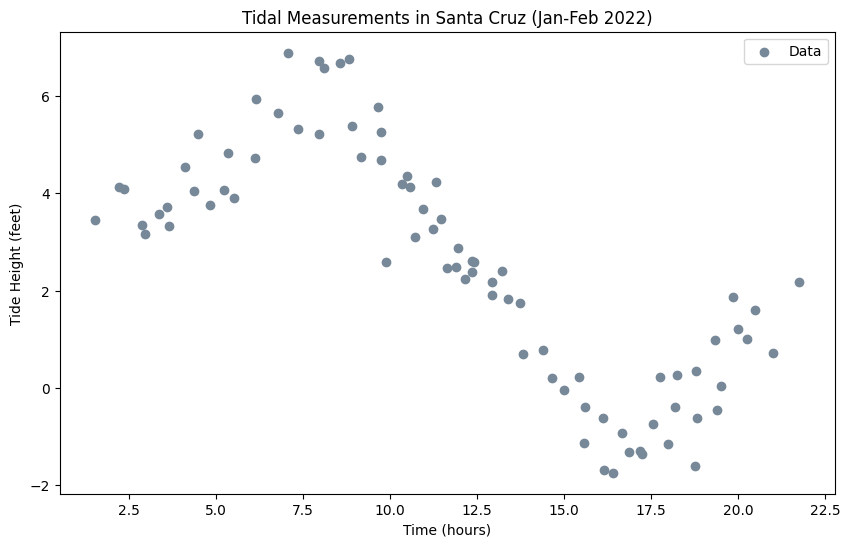

In [16]:
# Split the data into lines
lines = data.strip().split('\n')

# Extract day, time, and tide height from each line
days = []
times = []
heights = []

for line in lines:
    parts = line.split()
    days.append(int(parts[0]))
    times.append(parts[1])
    heights.append(float(parts[2]))

# Convert time to decimal hours for easier calculations
time_in_hours = [int(t.split(':')[0]) + int(t.split(':')[1])/60 for t in times]

# Create a function to model the oscillatory tide
def tide_model(t, A, omega, phi, C):
    return A * np.sin(omega * t + phi) + C

uncertainties = np.full_like(heights, 0.25)

# Fit the model to the data
params, covariance = curve_fit(tide_model, time_in_hours, heights, p0=[4, 0.5, 0, 2], sigma=uncertainties)

# Extract the parameters
A, omega, phi, C = params


# Plot the data and the model
plt.figure(figsize=(10, 6))
plt.scatter(time_in_hours, heights, label='Data', color='lightslategray')
plt.xlabel('Time (hours)')
plt.ylabel('Tide Height (feet)')
plt.title('Tidal Measurements in Santa Cruz (Jan-Feb 2022)')
plt.legend()
plt.savefig('tide_model.pdf')
plt.show()



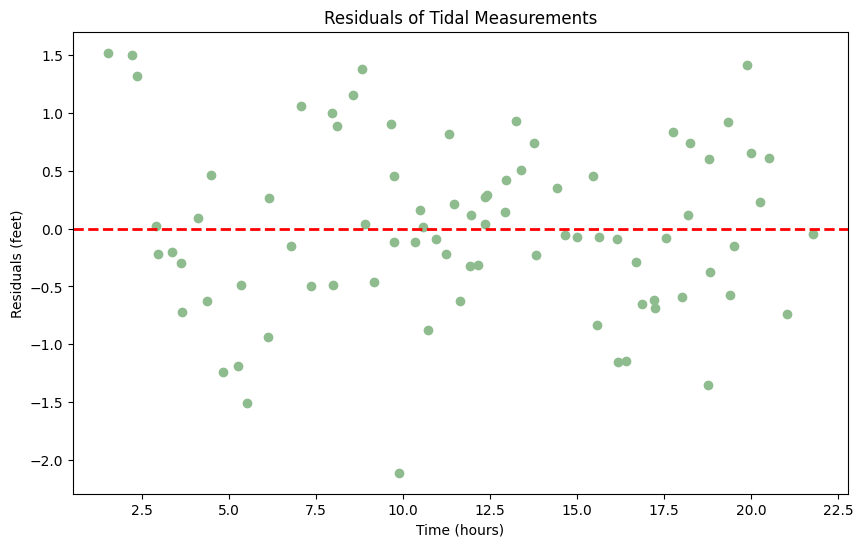

In [9]:
# Subtract the model from the data to get residuals
residuals = heights - model_tide

# Plot the residuals
plt.figure(figsize=(10, 6))
plt.scatter(time_in_hours, residuals, color='darkseagreen')
plt.axhline(0, color='red', linestyle='--', linewidth=2)
plt.xlabel('Time (hours)')
plt.ylabel('Residuals (feet)')
plt.title('Residuals of Tidal Measurements')
plt.savefig('residuals.pdf')
plt.show()

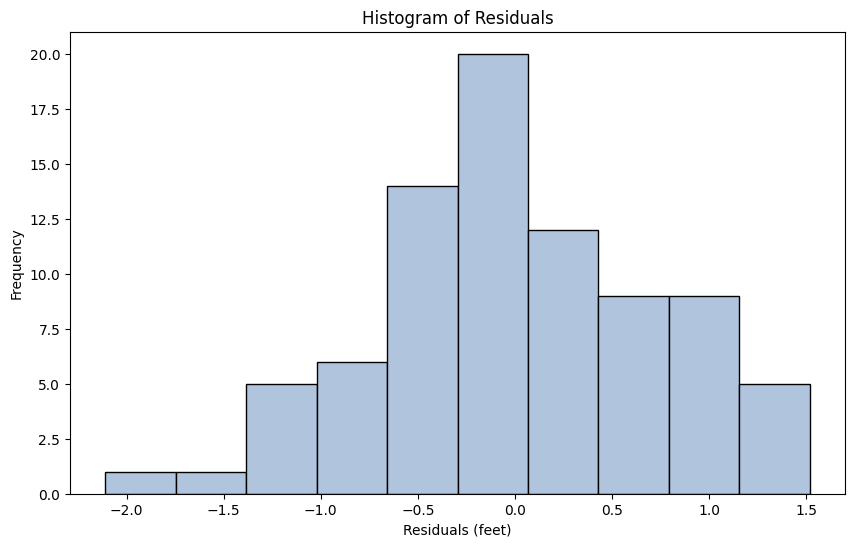

Standard deviation of residuals: 0.7342740162424541 feet


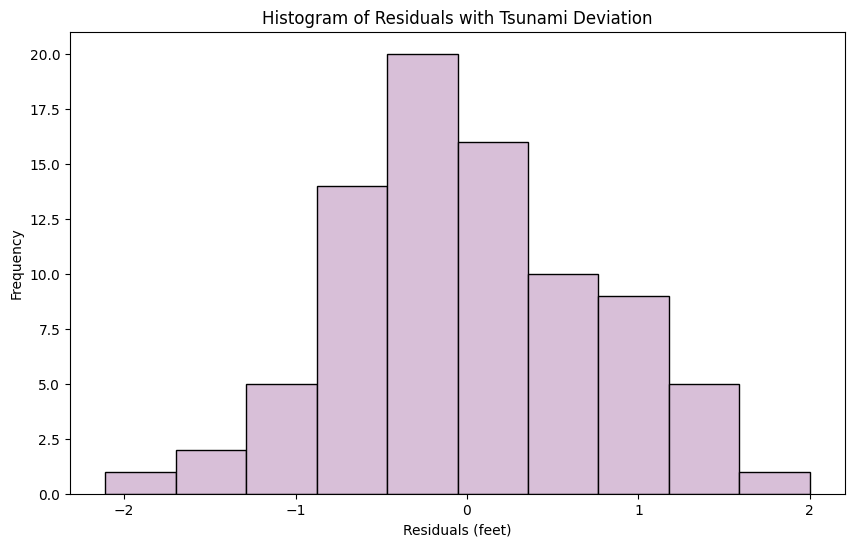

Standard deviation of residuals with tsunami deviation: 0.7617575616418663 feet


In [15]:
# Plot a histogram of the residuals
plt.figure(figsize=(10, 6))
plt.hist(residuals, bins=10, color='lightsteelblue', edgecolor='black')
plt.xlabel('Residuals (feet)')
plt.ylabel('Frequency')
plt.title('Histogram of Residuals')
plt.savefig('residuals_histogram.pdf')
plt.show()

# Calculate the standard deviation of the residuals
residuals_std = np.std(residuals)
print(f"Standard deviation of residuals: {residuals_std} feet")

# Add the tsunami deviation
tsunami_deviation = 2.0
residuals_with_tsunami = np.append(residuals, tsunami_deviation)

# Plot the histogram with the tsunami deviation
plt.figure(figsize=(10, 6))
plt.hist(residuals_with_tsunami, bins=10, color='thistle', edgecolor='black')
plt.xlabel('Residuals (feet)')
plt.ylabel('Frequency')
plt.title('Histogram of Residuals with Tsunami Deviation')
plt.savefig('residuals_histogram_with_tsunami.pdf')
plt.show()

# Calculate the standard deviation with tsunami deviation
residuals_with_tsunami_std = np.std(residuals_with_tsunami)
print(f"Standard deviation of residuals with tsunami deviation: {residuals_with_tsunami_std} feet")